## Capstone Project - The Battle of Neighborhoods

In [7]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
# library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [9]:
import pandas as pd

df = pd.read_csv('toronto.csv')
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [18]:
df_pop = pd.read_csv('toronto_test.csv') # load the census data
df_pop.head()

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Unnamed: 38
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,NaN
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,NaN
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,NaN
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,NaN
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,NaN


In [17]:
df_pop.dropna() # drop NaN from the data

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Unnamed: 38


In [23]:
df_pop['Under $5,000']

0      290
1       60
2      315
3      435
4      615
5      105
6      120
7      480
8      305
9      165
10     260
11     175
12     315
13     225
14     540
15     195
16      90
17     175
18     790
19     585
20     245
21    2935
22     560
23     220
24     345
25     265
26     255
27     455
28     345
29     330
30      70
31     180
32     255
33      55
34     195
35     120
36     250
37     145
38     575
39     190
40     180
41     920
42     205
43     305
44     215
45     165
46     615
47    1975
48     155
49     145
50    2510
51      55
52     485
53     145
54     140
55     215
56     245
57     850
58     230
59     515
60     680
61     140
62      50
63     165
64      55
65     245
66     380
67     445
68     215
69     265
70     230
71     900
72     190
73      45
74      85
75     710
76     175
77      45
78     360
79     185
80    2540
81     110
82      40
83      45
84     150
85     105
86     185
87     320
Name: Under $5,000, dtype: int64

In [27]:
PostCode = []
Borough=[]
Neighborhood=[]
Population=[]
Longitude = []
Latitude = []
P_density = []
Area = []
P1 = []
P2 = []
P3 = []
P4 = []
P5 = []
P6 = []
P7 = []
P8 = []
P9 = []
P10 = []
P11 = []
P12 = []
P13 = []
P14 = []
P15 = []
P16 = []
P17 = []
P18 = []
P19 = []
P20 = []
South_Asian = []
Chinese = []
Black = []
Filipino = []
Latin_American = []
Arab = []
Southeast_Asian =[]
West_Asian = []
Korean = []
Japanese = []
White = []
SP = []

for i in df['PostalCode']:
    if df_pop['PostalCode'].isin([i]).any():
        PostCode.append(i)
        loc = df.index[df['PostalCode']==i]
        Borough.append(df['Borough'][loc].values[0])
        Neighborhood.append(df['Neighborhood'][loc].values[0])
        Latitude.append(df['Latitude'][loc].values[0])
        Longitude.append(df['Longitude'][loc].values[0])
        loc = df_pop.index[df_pop['PostalCode']==i]
        Population.append(df_pop['Population, 2016'][loc].values[0])
        P_density.append(df_pop['Population density per square kilometre'][loc].values[0])
        Area.append(df_pop['Land area in square kilometres'][loc].values[0])
        p1=(df_pop['Under $5,000'][loc].values[0])
        p2=(df_pop['$5,000 to $9,999'][loc].values[0])
        p3=(df_pop['$10,000 to $14,999'][loc].values[0])
        p4=(df_pop['$15,000 to $19,999'][loc].values[0])
        p5=(df_pop['$20,000 to $24,999'][loc].values[0])
        p6=(df_pop['$25,000 to $29,999'][loc].values[0])
        p7=(df_pop['$30,000 to $34,999'][loc].values[0])
        p8=(df_pop['$35,000 to $39,999'][loc].values[0])
        p9=(df_pop['$40,000 to $44,999'][loc].values[0])
        p10=(df_pop['$45,000 to $49,999'][loc].values[0])
        p11=(df_pop['$50,000 to $59,999'][loc].values[0])
        p12=(df_pop['$60,000 to $69,999'][loc].values[0])
        p13=(df_pop['$70,000 to $79,999'][loc].values[0])
        p14=(df_pop['$80,000 to $89,999'][loc].values[0])
        p15=(df_pop['$90,000 to $99,999'][loc].values[0])
        p16=(df_pop['$100,000 and over'][loc].values[0])
        p17=(df_pop['$100,000 to $124,999'][loc].values[0])
        p18=(df_pop['$125,000 to $149,999'][loc].values[0])
        p19=(df_pop['$150,000 to $199,999'][loc].values[0])
        p20=(df_pop['$200,000 and over'][loc].values[0])
        South_Asian.append(df_pop['South Asian'][loc].values[0])
        Chinese.append(df_pop['Chinese'][loc].values[0])
        Black.append(df_pop['Black'][loc].values[0])
        Filipino.append(df_pop['Filipino'][loc].values[0])
        Latin_American.append(df_pop['Latin American'][loc].values[0])
        Arab.append(df_pop['Arab'][loc].values[0])
        Southeast_Asian.append(df_pop['Southeast Asian'][loc].values[0])
        West_Asian.append(df_pop['West Asian'][loc].values[0])
        Korean.append(df_pop['Korean'][loc].values[0])
        Japanese.append(df_pop['Japanese'][loc].values[0])
        White.append(df_pop['White'][loc].values[0])
        sp = 5000*p1+7500*p2+12500*p3+17500*p4+22500*p5+27500*p6+32500*p7+37500*p8+42500*p9+\
        47500*p10+55000*p11+65000*p12+75000*p13+85000*p14+95000*p15+112500*p17+137500*p18+\
        175000*p19+200000*p20
        P1.append(p1)
        P2.append(p2)
        P3.append(p3)
        P4.append(p4)
        P5.append(p5)
        P6.append(p6)
        P7.append(p7)
        P8.append(p8)
        P9.append(p9)
        P10.append(p10)
        P11.append(p11)
        P12.append(p12)
        P13.append(p13)
        P14.append(p14)
        P15.append(p15)
        P16.append(p16)
        P17.append(p17)
        P18.append(p18)
        P19.append(p19)
        P20.append(p20)
        SP.append(sp)

In [28]:
df_data = pd.DataFrame({'PostCode':PostCode,'Borough':Borough,'Neighborhood':Neighborhood,'Latitude':Latitude,
                        'Longitude':Longitude,'Population':Population,'Density':P_density,'Area':Area,
                       '< 5k':P1,'5k - 10k':P2,'10k - 15k':P3,'15k - 20k':P4,'20k - 25k':P5,'25k - 30k':P6,
                        '30k - 35k':P7,'35k - 40k':P8,'40k - 45k':P9,'45k - 50k':P10,'50k - 60k':P11,
                        '60k - 70k':P12,'70k - 80k':P13,'80k - 90k':P14,'90k - 100k':P15,'100k - 125k':P17,
                        '125k - 150k':P18,'150k - 200k':P19,'> 200k':P20, 'South Asian':South_Asian,
                       'Chinese':Chinese,'Black':Black,'Filipino':Filipino,'Latin American':Latin_American,
                       'Arab':Arab,'Southeast Asian':Southeast_Asian,'West Asian':West_Asian,'Korean':Korean,
                       'Japanese':Japanese,'White':White,'Spending Power':SP})

In [29]:
df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M3A,North York,Parkwoods,43.753259,-79.329656,34805,4691,7.42,345,185,315,520,590,600,615,575,620,620,1200,1025,880,790,650,1220,790,890,890,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,1050425000
1,M4A,North York,Victoria Village,43.725882,-79.315572,17510,3710,4.72,180,205,280,540,420,385,400,370,370,425,640,570,490,385,290,565,315,325,240,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,479237500
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716,25823,8.01,1975,1180,1535,1695,1520,1440,1370,1425,1485,1460,3085,3305,3150,2805,2580,4825,3200,3695,4000,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3905512500
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,6577,3614,1.82,50,60,160,190,185,170,190,170,155,125,205,200,160,110,105,165,95,100,60,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,156662500
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290,6208,45.74,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,2331712500


In [30]:
df_data["Spending Power"] = (df_data["Spending Power"]-df_data["Spending Power"].mean())/df_data["Spending Power"].std()

df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M3A,North York,Parkwoods,43.753259,-79.329656,34805,4691,7.42,345,185,315,520,590,600,615,575,620,620,1200,1025,880,790,650,1220,790,890,890,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.061812
1,M4A,North York,Victoria Village,43.725882,-79.315572,17510,3710,4.72,180,205,280,540,420,385,400,370,370,425,640,570,490,385,290,565,315,325,240,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.693676
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716,25823,8.01,1975,1180,1535,1695,1520,1440,1370,1425,1485,1460,3085,3305,3150,2805,2580,4825,3200,3695,4000,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.838132
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,6577,3614,1.82,50,60,160,190,185,170,190,170,155,125,205,200,160,110,105,165,95,100,60,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,-1.120335
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290,6208,45.74,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524


In [32]:

latitude = '43.653963'
longitude = '-79.387207'
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [33]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,).add_to(map_toronto)  
    
map_toronto

In [34]:

CLIENT_ID = 'QHYZIITMAAY2A33PQWHEYIMEIGNFJLMYEM3NSTLFISQOOPDU' # your Foursquare ID
CLIENT_SECRET = 'DPQEM35XT5OOUWXNUOLIH44F25NSBD3FO4B1G111WJ4XABLB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QHYZIITMAAY2A33PQWHEYIMEIGNFJLMYEM3NSTLFISQOOPDU
CLIENT_SECRET:DPQEM35XT5OOUWXNUOLIH44F25NSBD3FO4B1G111WJ4XABLB


In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
LIMIT = 200
venues = getNearbyVenues(names=df_data['Neighborhood'],
                                   latitudes=df_data['Latitude'],
                                   longitudes=df_data['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront, Regent Park
Lawrence Heights, Lawrence Manor
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Highland Creek, Rouge Hill, Port Union
Flemingdon Park, Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Guildwood, Morningside, West Hill
The Beaches
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
East Birchmount Park, Ionview, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Cen

In [38]:
print(venues.shape)
venues.head()

(7286, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Donalda Golf & Country Club,43.752816,-79.342741,Golf Course
2,Parkwoods,43.753259,-79.329656,Graydon Hall Manor,43.763923,-79.342961,Event Space
3,Parkwoods,43.753259,-79.329656,Island Foods,43.745866,-79.346035,Caribbean Restaurant
4,Parkwoods,43.753259,-79.329656,Galleria Supermarket,43.753520,-79.349518,Supermarket


In [39]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,100,100,100,100,100,100
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",99,99,99,99,99,99
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",48,48,48,48,48,48
"Alderwood, Long Branch",100,100,100,100,100,100
"Bathurst Manor, Downsview North, Wilson Heights",54,54,54,54,54,54
Bayview Village,54,54,54,54,54,54
"Bedford Park, Lawrence Manor East",100,100,100,100,100,100
"Birch Cliff, Cliffside West",47,47,47,47,47,47


In [40]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 315 uniques categories.


In [41]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stables,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaur

In [42]:
venues_grouped = venues_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stables,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaur

In [43]:
num_top_venues = 10

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop   7.0
1                Hotel   6.0
2                 Café   6.0
3          Pizza Place   3.0
4       Clothing Store   3.0
5           Restaurant   3.0
6                Plaza   3.0
7                 Park   3.0
8                  Gym   3.0
9  Japanese Restaurant   3.0


----Agincourt----
                venue  freq
0  Chinese Restaurant  11.0
1         Coffee Shop   8.0
2            Pharmacy   5.0
3          Restaurant   5.0
4       Shopping Mall   3.0
5   Indian Restaurant   3.0
6                Bank   3.0
7      Sandwich Place   3.0
8    Sushi Restaurant   2.0
9      Breakfast Spot   2.0


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                   venue  freq
0     Chinese Restaurant  14.0
1            Coffee Shop   7.0
2                   Park   4.0
3            Pizza Place   4.0
4           Dessert Shop   4.0
5        Bubble Tea Shop   4.0
6      Korean Restaurant   4.0
7    

9  Brazilian Restaurant   2.0


----Downsview Central----
                   venue  freq
0  Vietnamese Restaurant   5.0
1                   Bank   4.0
2   Fast Food Restaurant   4.0
3            Pizza Place   4.0
4            Coffee Shop   4.0
5            Gas Station   3.0
6          Grocery Store   3.0
7               Pharmacy   3.0
8            Supermarket   2.0
9             Beer Store   2.0


----East Birchmount Park, Ionview, Kennedy Park----
                  venue  freq
0           Coffee Shop   4.0
1         Grocery Store   4.0
2    Chinese Restaurant   4.0
3              Pharmacy   4.0
4        Sandwich Place   3.0
5  Fast Food Restaurant   3.0
6                  Bank   2.0
7            Beer Store   2.0
8        Discount Store   2.0
9             Pet Store   1.0


----East Toronto----
                  venue  freq
0                  Café   9.0
1      Greek Restaurant   8.0
2                Bakery   4.0
3           Coffee Shop   4.0
4    Italian Restaurant   3.0
5             

                         venue  freq
0                  Coffee Shop   8.0
1                         Café   8.0
2                       Bakery   6.0
3                          Bar   5.0
4                         Park   5.0
5           Italian Restaurant   4.0
6                   Restaurant   4.0
7  Eastern European Restaurant   3.0
8                    Gastropub   3.0
9                    Gift Shop   2.0


----Parkwoods----
                 venue  freq
0          Coffee Shop  10.0
1          Pizza Place   5.0
2  Japanese Restaurant   4.0
3       Sandwich Place   3.0
4          Supermarket   3.0
5             Pharmacy   3.0
6       Discount Store   3.0
7   Chinese Restaurant   3.0
8          Gas Station   3.0
9  Fried Chicken Joint   3.0


----Roselawn----
                       venue  freq
0                Coffee Shop   9.0
1         Italian Restaurant   9.0
2                       Café   5.0
3  Middle Eastern Restaurant   3.0
4        Japanese Restaurant   3.0
5                 Restaur

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Hotel,Japanese Restaurant,Theater,Clothing Store,Restaurant,Park,Pizza Place,Plaza
1,Agincourt,Chinese Restaurant,Coffee Shop,Pharmacy,Restaurant,Bank,Sandwich Place,Shopping Mall,Indian Restaurant,Furniture / Home Store,Bakery
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Chinese Restaurant,Coffee Shop,Park,Bubble Tea Shop,Gas Station,Vietnamese Restaurant,Bakery,Korean Restaurant,Dessert Shop,Pizza Place
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Coffee Shop,Pizza Place,Fast Food Restaurant,Indian Restaurant,Sandwich Place,Grocery Store,Thrift / Vintage Store,Bank,Discount Store,Park
4,"Alderwood, Long Branch",Coffee Shop,Pizza Place,Fast Food Restaurant,Department Store,Sandwich Place,Electronics Store,Seafood Restaurant,Burger Joint,Café,Clothing Store


In [46]:
venues_grouped.columns.values.tolist()

['Neighborhood',
 'Zoo Exhibit',
 'Accessories Store',
 'Afghan Restaurant',
 'African Restaurant',
 'Airport',
 'American Restaurant',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Argentinian Restaurant',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'Auto Garage',
 'Automotive Shop',
 'BBQ Joint',
 'Baby Store',
 'Badminton Court',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Court',
 'Basketball Stadium',
 'Bath House',
 'Beach',
 'Beach Bar',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Big Box Store',
 'Bike Shop',
 'Bistro',
 'Boat or Ferry',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bridge',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Butcher',
 'Café',
 'Candy Store',
 'Cantonese Restaurant',
 'Ca

In [55]:
total_restaurants = venues_grouped['African Restaurant']+venues_grouped['American Restaurant']+\
venues_grouped['Argentinian Restaurant']+venues_grouped['Asian Restaurant']+venues_grouped['BBQ Joint']+\
venues_grouped['Bagel Shop']+venues_grouped['Belgian Restaurant']+venues_grouped['Brazilian Restaurant']+\
venues_grouped['Breakfast Spot']+venues_grouped['Burger Joint']+venues_grouped['Burrito Place']+\
+venues_grouped['Cantonese Restaurant']+venues_grouped['Caribbean Restaurant']+\
venues_grouped['Caucasian Restaurant']+venues_grouped['Chinese Restaurant']+venues_grouped['Comfort Food Restaurant']+\
venues_grouped['Cuban Restaurant']+venues_grouped['Deli / Bodega']+venues_grouped['Dim Sum Restaurant']+\
venues_grouped['Diner']+venues_grouped['Doner Restaurant']+venues_grouped['Dumpling Restaurant']+\
venues_grouped['Eastern European Restaurant']+venues_grouped['Egyptian Restaurant']+venues_grouped['Ethiopian Restaurant']+\
venues_grouped['Falafel Restaurant']+venues_grouped['Fast Food Restaurant']+venues_grouped['Filipino Restaurant']+\
venues_grouped['Fish & Chips Shop']+venues_grouped['French Restaurant']+venues_grouped['Fried Chicken Joint']+\
venues_grouped['German Restaurant']+venues_grouped['Greek Restaurant']+venues_grouped['Hakka Restaurant']+\
venues_grouped['Hawaiian Restaurant']+venues_grouped['Hong Kong Restaurant']+\
venues_grouped['Hotpot Restaurant']+venues_grouped['Hungarian Restaurant']+venues_grouped['Indian Chinese Restaurant']+\
venues_grouped['Indian Restaurant']+venues_grouped['Indonesian Restaurant']+venues_grouped['Italian Restaurant']+\
venues_grouped['Japanese Restaurant']+venues_grouped['Jewish Restaurant']+venues_grouped['Korean Restaurant']+\
venues_grouped['Latin American Restaurant']+venues_grouped['Mediterranean Restaurant']+venues_grouped['Malay Restaurant']+\
venues_grouped['Mexican Restaurant']+venues_grouped['Middle Eastern Restaurant']+\
venues_grouped['Moroccan Restaurant']+venues_grouped['New American Restaurant']+venues_grouped['Pakistani Restaurant']+\
venues_grouped['Persian Restaurant']+venues_grouped['Peruvian Restaurant']+venues_grouped['Pizza Place']+\
venues_grouped['Portuguese Restaurant']+venues_grouped['Ramen Restaurant']+venues_grouped['Restaurant']+\
venues_grouped['Salad Place']+venues_grouped['Sandwich Place']+\
venues_grouped['Seafood Restaurant']+\
venues_grouped['South American Restaurant']+venues_grouped['Spanish Restaurant']+venues_grouped['Sri Lankan Restaurant']+\
venues_grouped['Steakhouse']+venues_grouped['Sushi Restaurant']+venues_grouped['Szechuan Restaurant']+\
venues_grouped['Taco Place']+venues_grouped['Tapas Restaurant']+venues_grouped['Thai Restaurant']+\
venues_grouped['Tibetan Restaurant']+venues_grouped['Turkish Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+\
venues_grouped['Vietnamese Restaurant']+venues_grouped['Wings Joint']

In [56]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Indian Restaurants':venues_grouped['Indian Restaurant']})

In [57]:
df_final = pd.merge(df_data,df_restaurants,on='Neighborhood')
df_final.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power,Total Restaurants,Indian Restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,34805,4691,7.42,345,185,315,520,590,600,615,575,620,620,1200,1025,880,790,650,1220,790,890,890,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.061812,41,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,17510,3710,4.72,180,205,280,540,420,385,400,370,370,425,640,570,490,385,290,565,315,325,240,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.693676,28,1
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716,25823,8.01,1975,1180,1535,1695,1520,1440,1370,1425,1485,1460,3085,3305,3150,2805,2580,4825,3200,3695,4000,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.838132,26,0
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,6577,3614,1.82,50,60,160,190,185,170,190,170,155,125,205,200,160,110,105,165,95,100,60,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,-1.120335,30,0
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290,6208,45.74,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524,11,0


In [58]:
df_final1=df_final.drop(['PostCode','Borough','Latitude','Longitude','Density','South Asian','Chinese',
                         'Black','Filipino','Latin American','Arab','Southeast Asian','West Asian','Korean',
                         'Japanese','White','< 5k','5k - 10k','10k - 15k','15k - 20k','20k - 25k','25k - 30k',
                         '30k - 35k','35k - 40k','40k - 45k','45k - 50k','50k - 60k','60k - 70k','70k - 80k',
                         '80k - 90k','90k - 100k','100k - 125k','125k - 150k','150k - 200k','> 200k'],axis=1)


In [59]:
# set number of clusters
kclusters = 5

grouped_clustering = df_final1.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 1, 0, 3, 0, 4, 4, 1, 0, 3])

In [60]:
# add clustering labels
df_final1.insert(0, 'Cluster Labels', kmeans.labels_)

In [61]:
venues_merged = df_final.loc[:,'PostCode':'Longitude']
venues_merged.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353


In [62]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
venues_merged = venues_merged.join(df_final1.set_index('Neighborhood'), on='Neighborhood')

venues_merged.head() # check the last columns!

,PostCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,4,34805,7.42,0.061812,41,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,1,17510,4.72,-0.693676,28,1
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,0,76716,8.01,3.838132,26,0
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,3,6577,1.82,-1.120335,30,0
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0,90290,45.74,1.756524,11,0


In [64]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Neighborhood'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged['Indian Restaurants'],venues_merged['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nIndian Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [65]:
venues_merged.loc[venues_merged['Cluster Labels'] == 0, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
2,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,0,76716,8.01,3.838132,26,0
4,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0,90290,45.74,1.756524,11,0
8,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,0,105450,26.38,3.748670,20,0
45,North York,"Newtonbrook, Willowdale",43.789053,-79.408493,0,90362,13.80,2.350813,49,0
59,West Toronto,"High Park, The Junction South",43.661608,-79.464763,0,82712,10.51,2.841538,28,1
74,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577,0,86468,19.96,1.712083,50,3


In [66]:

venues_merged.loc[venues_merged['Cluster Labels'] == 1, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
1,North York,1,17510,4.72,-0.693676,28,1
7,Downtown Toronto,1,21210,2.23,-0.475950,33,0
10,North York,1,21933,2.43,-0.719039,36,1
16,East Toronto,1,21567,3.56,0.044651,35,1
19,East York,1,16828,4.68,-0.262058,29,5
22,North York,1,16934,5.38,-0.627957,25,0
24,East York,1,21108,3.11,-0.797208,36,3
27,Scarborough,1,16724,3.10,-0.832936,28,1
31,Downtown Toronto,1,20506,1.39,-0.269598,26,1
34,North York,1,21396,5.10,-0.304615,16,0


In [67]:
venues_merged.loc[venues_merged['Cluster Labels'] == 2, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
15,Scarborough,2,54764,19.04,0.671610,17,0
18,Scarborough,2,53485,12.31,0.313102,24,2
23,North York,2,67397,23.84,1.300205,21,0
28,North York,2,42774,6.80,0.243348,35,0
36,East Toronto,2,61173,13.31,1.843853,40,1
39,Scarborough,2,56512,10.30,0.474186,39,1
44,Scarborough,2,55834,13.83,0.569401,12,0
56,Scarborough,2,51575,15.42,0.245414,45,2
57,Central Toronto,2,46433,4.45,1.450377,41,3
76,Downtown Toronto,2,48217,6.28,1.784416,24,0


In [69]:
cluster = venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]
cluster.head(10)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
3,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,3,6577,1.82,-1.120335,30,0
9,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,3,12494,5.20,-0.802399,14,0
11,East York,Woodbine Heights,43.695344,-79.318389,3,7865,1.17,-0.934319,30,0
12,Downtown Toronto,St. James Town,43.651494,-79.375418,3,15818,3.00,-0.727471,24,0
13,York,Humewood-Cedarvale,43.693781,-79.428191,3,14365,1.87,-0.604628,47,3
17,York,Caledonia-Fairbanks,43.689026,-79.453512,3,9955,1.54,-0.957250,45,0
25,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,3,7727,0.95,-0.982116,27,0
30,East York,East Toronto,43.685347,-79.338106,3,11499,1.70,-0.809310,39,2
33,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,3,13641,1.94,-0.891249,21,0
37,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,3,13826,1.44,-0.607571,23,0


Text(0, 0.5, 'Count')

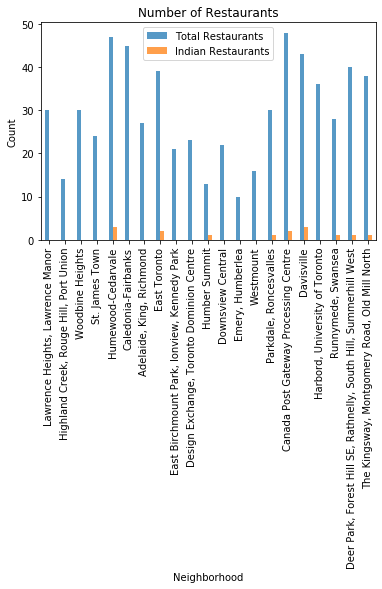

In [70]:
%matplotlib inline

ax = cluster.plot(x='Neighborhood',y=['Total Restaurants','Indian Restaurants'],kind='bar',alpha=0.75,title='Number of Restaurants')
ax.set_ylabel('Count')

Text(0, 0.5, 'Normalized Spending Power ($)')

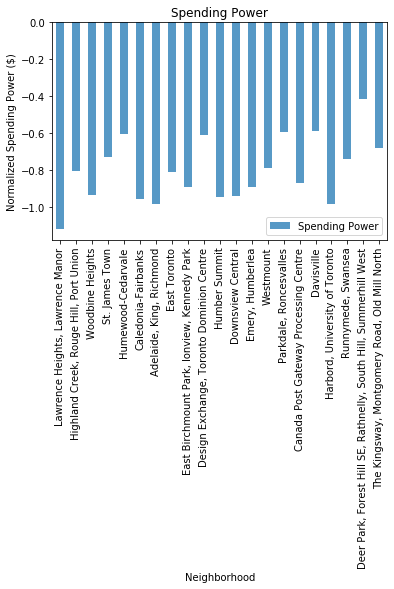

In [71]:
ax = cluster.plot(x='Neighborhood',y=['Spending Power'],kind='bar',alpha=0.75,title='Spending Power')
ax.set_ylabel('Normalized Spending Power ($)')

Text(0, 0.5, 'Population')

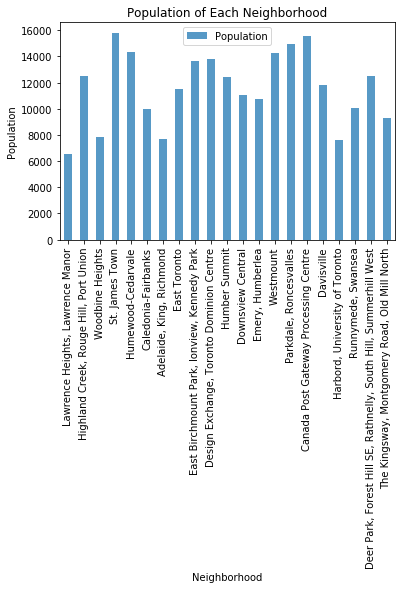

In [72]:
ax = cluster.plot(x='Neighborhood',y=['Population'],kind='bar',alpha=0.75,title='Population of Each Neighborhood')
ax.set_ylabel('Population')

In [74]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(cluster['Latitude'], cluster['Longitude'], cluster['Neighborhood'], cluster['Cluster Labels'],cluster['Total Restaurants'],cluster['Indian Restaurants'],cluster['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nIndian Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters